Starting gradient descent at b = 0, w = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, w = 1.4777440851894448, error = 112.61481011613473


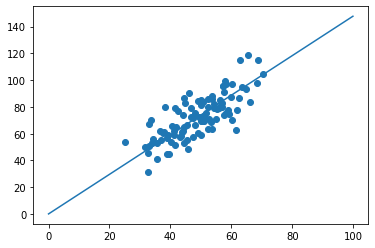

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# y = wx + b
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # computer mean-squared-error
        totalError += (y - (w * x + b)) ** 2
    # average loss for each point
    return totalError / float(len(points))



def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # grad_b = 2(wx+b-y)
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        #print('b_gradient:',b_gradient)
        # grad_w = 2(wx+b-y)*x
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
        #print('w_gradient:',w_gradient)
    # update w'
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    
    #print("err={0}",compute_error_for_line_given_points(new_b,new_w,points));
    
    return [new_b, new_w]

def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]


def run():
	
    points = np.genfromtxt("data.csv", delimiter=",")
    plt.scatter(points[:,0],points[:,1])  #[[x0,y0][x1,y1]]    #point numpy 二维数组取某一列
    #plt.show()
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w,
                  compute_error_for_line_given_points(initial_b, initial_w, points))
          )
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, w = {2}, error = {3}".
          format(num_iterations, b, w,
                 compute_error_for_line_given_points(b, w, points))
          )
    px = np.arange(0,100,0.1);
    pw = w
    pb = b
    py = px*w+b;
    plt.plot(px,py)
    plt.show()
    


if __name__ == '__main__':
    run()

(100, 100)


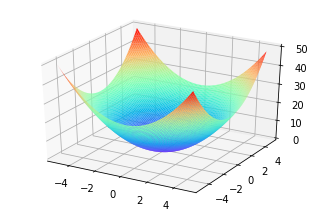

In [69]:

#  这样的目的画成一个
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
 
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y )  # 转换成二维的矩阵坐标

 
fig = plt.figure(1, figsize=(12, 8))
zz =  (xx**2 + yy**2)
print(zz.shape)
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_top_view()
 
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [166]:
a = np.array([[0,1],[0,2]])
a[:,1]
b = np.array([[0,1,2],[0,1,2]])
c =np.array([[2,1,0]])
print(b.shape)
print(c.shape)
d = np.dot(b,c.T)
print(d.shape)
print(d)

e = 3
f = np.dot(b,e)
f


(2, 3)
(1, 3)
(2, 1)
[[1]
 [1]]


array([[0, 3, 6],
       [0, 3, 6]])

len 100
w[1] 0.02
loss 73668.01924423852


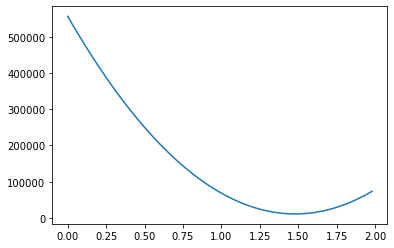

Z: [[556510.78344832 541869.0159487  527426.52534421 ...  64092.55969383
   68780.65102147  73668.01924424]
 [556510.79344832 541869.0259487  527426.53534421 ...  64092.56969383
   68780.66102147  73668.02924424]
 [556510.80344832 541869.0359487  527426.54534421 ...  64092.57969383
   68780.67102147  73668.03924424]
 ...
 [556511.75344832 541869.9859487  527427.49534421 ...  64093.52969383
   68781.62102147  73668.98924424]
 [556511.76344832 541869.9959487  527427.50534421 ...  64093.53969383
   68781.63102147  73668.99924424]
 [556511.77344832 541870.0059487  527427.51534421 ...  64093.54969383
   68781.64102147  73669.00924424]]


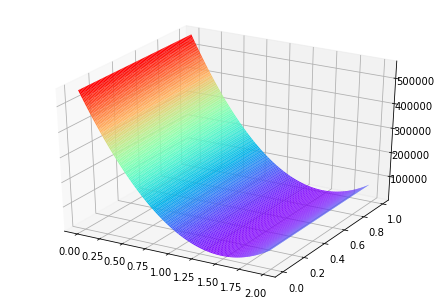

In [227]:
 points = np.genfromtxt("data.csv", delimiter=",")
x = points[:,0]
xx = np.asarray(x)
xlen = len(xx)
print('len',len(xx))
y = points[:,1]
y = np.asarray(y)
w = np.arange(0.0,2.0,0.02)
wx = w.copy()
b = np.arange(0.0,1.0,0.01)

print('w[1]',w[1])
#print('xx',xx)
#print('xxw[1]',np.dot(w[1],x.T))
loss = np.sum((np.dot(w[i],x)-y)**2)
print('loss',loss)

for i in range(len(xx)):
   w[i] = np.sum((np.dot(w[i],x)-y)**2)
#print(w)

import matplotlib.pyplot as plt
plt.plot(wx,w)
plt.show()

W, B = np.meshgrid(wx, b)
w = np.asarray(w).reshape(1,-1)
Z = w
Z = Z+B

#print (W)
#print (B)
print('Z:',Z) 

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(W, B, Z, rstride=1, cstride=1, cmap='rainbow')
#plt.scatter(w,b,loss)
plt.show()




